# Análise das Marinhas Europeias

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [10]:
PATH = os.path.join('.\\..\\data\\navy_europe.csv')
df = pd.read_csv(PATH)

display(df.head(df.shape[0]))

,País,Corvetas,Fragatas,Destroyers,Submarinos,Porta-aviões,Orçamento_Marinha,Quantidade_Torpedos,Quantidade_Misseis
0,França,10,10,5,10,1,50,100,130
1,Reino Unido,8,12,6,7,2,45,106,138
2,Alemanha,6,4,3,6,0,30,54,54
3,Itália,8,6,4,4,1,25,52,56
4,Rússia,12,15,10,20,1,55,176,320
5,Noruega,5,4,0,6,0,10,38,72
6,Suécia,4,2,0,5,0,8,24,52
7,Espanha,7,5,3,4,1,20,40,45
8,Países Baixos,4,4,2,4,0,15,28,28
9,Grécia,6,4,2,3,0,12,30,26


# Visualização dos equipamentos navais

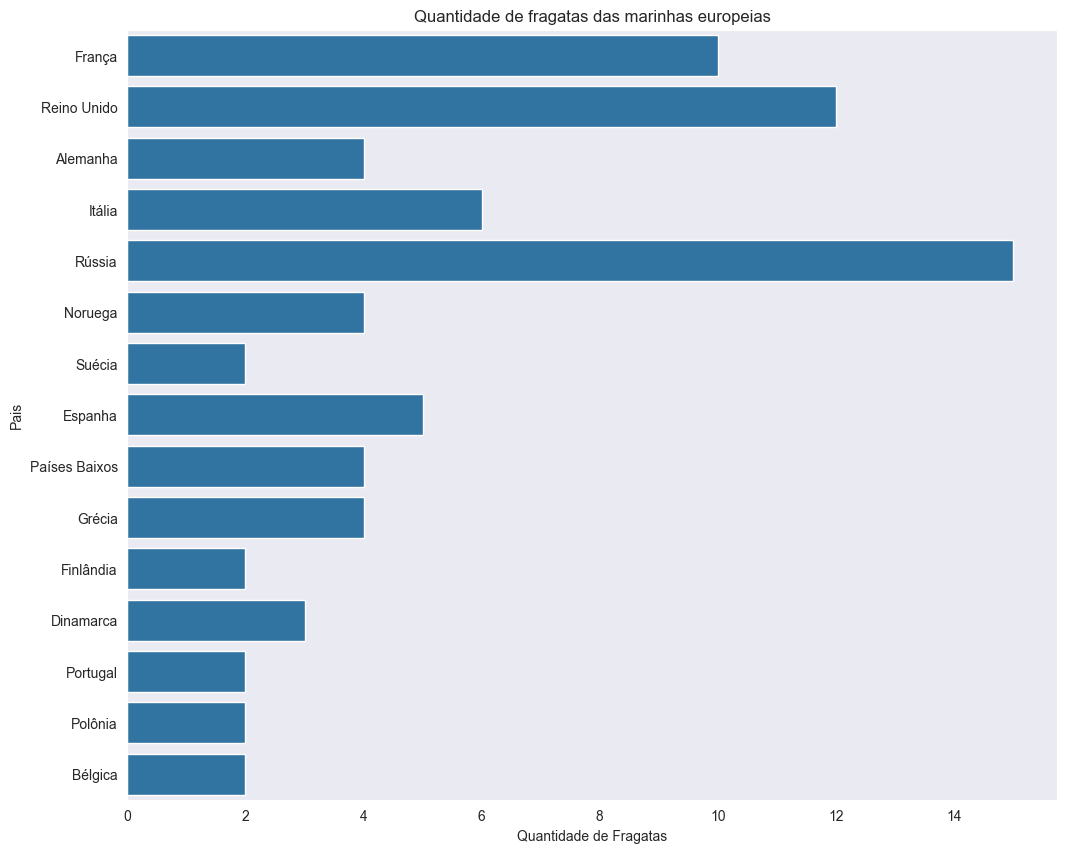

In [11]:
sns.set_style('dark')
plt.figure(figsize=(12,10))
plt.title('Quantidade de fragatas das marinhas europeias');
sns.barplot(data=df, x='Fragatas', y='País', orient='h')
plt.xlabel('Quantidade de Fragatas')
plt.ylabel('Pais');


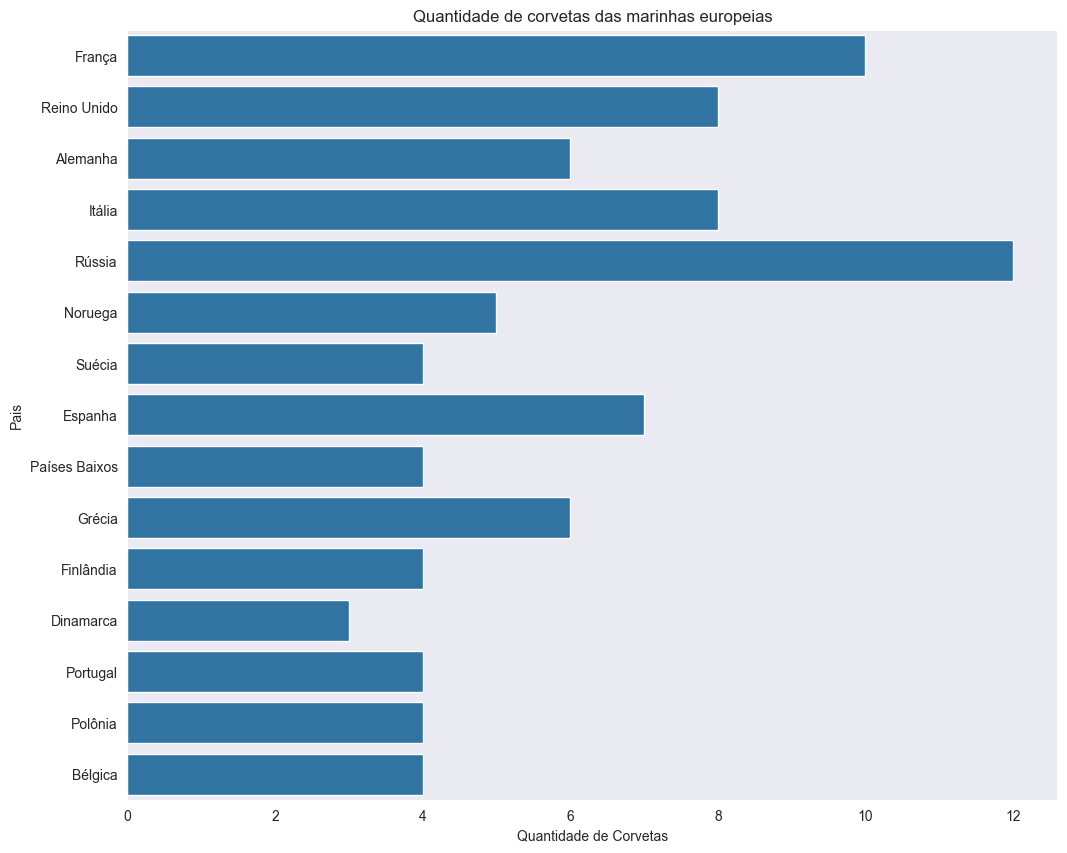

In [12]:
sns.set_style('dark')
plt.figure(figsize=(12,10))
plt.title('Quantidade de corvetas das marinhas europeias');
sns.barplot(data=df, x='Corvetas', y='País', orient='h')
plt.xlabel('Quantidade de Corvetas')
plt.ylabel('Pais');


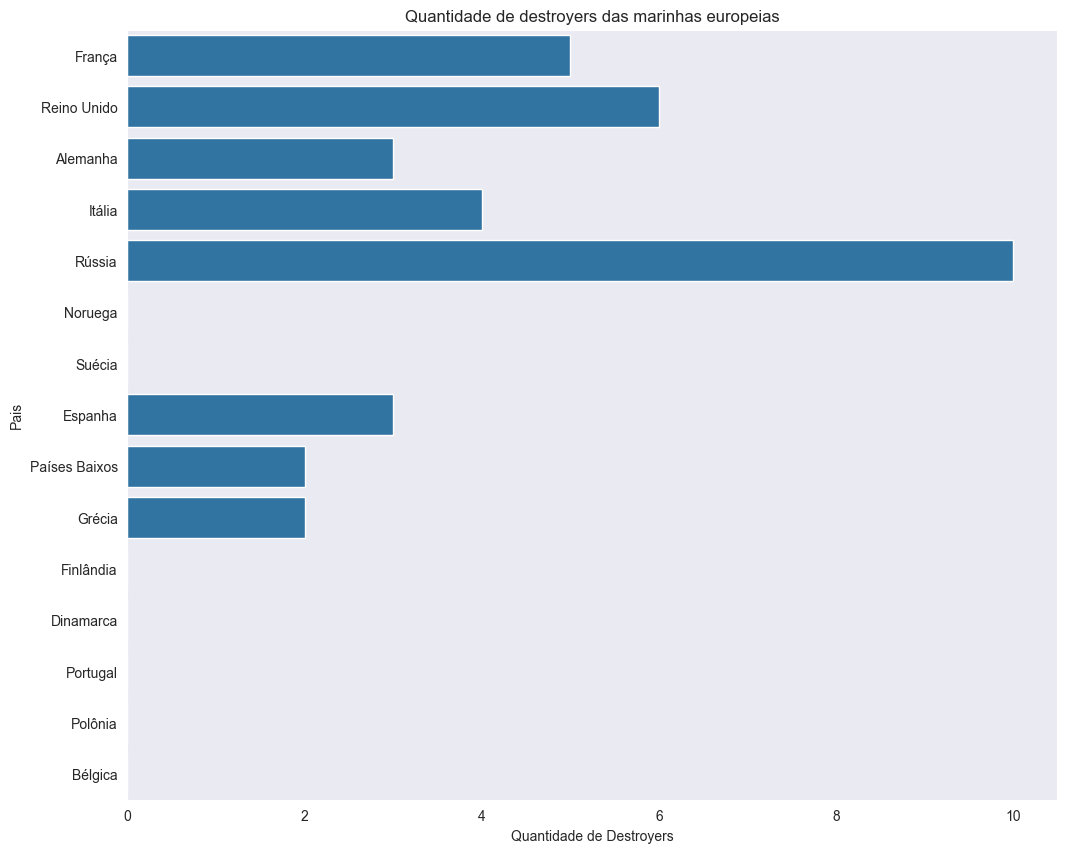

In [13]:
sns.set_style('dark')
plt.figure(figsize=(12,10))
plt.title('Quantidade de destroyers das marinhas europeias');
sns.barplot(data=df, x='Destroyers', y='País', orient='h')
plt.xlabel('Quantidade de Destroyers')
plt.ylabel('Pais');


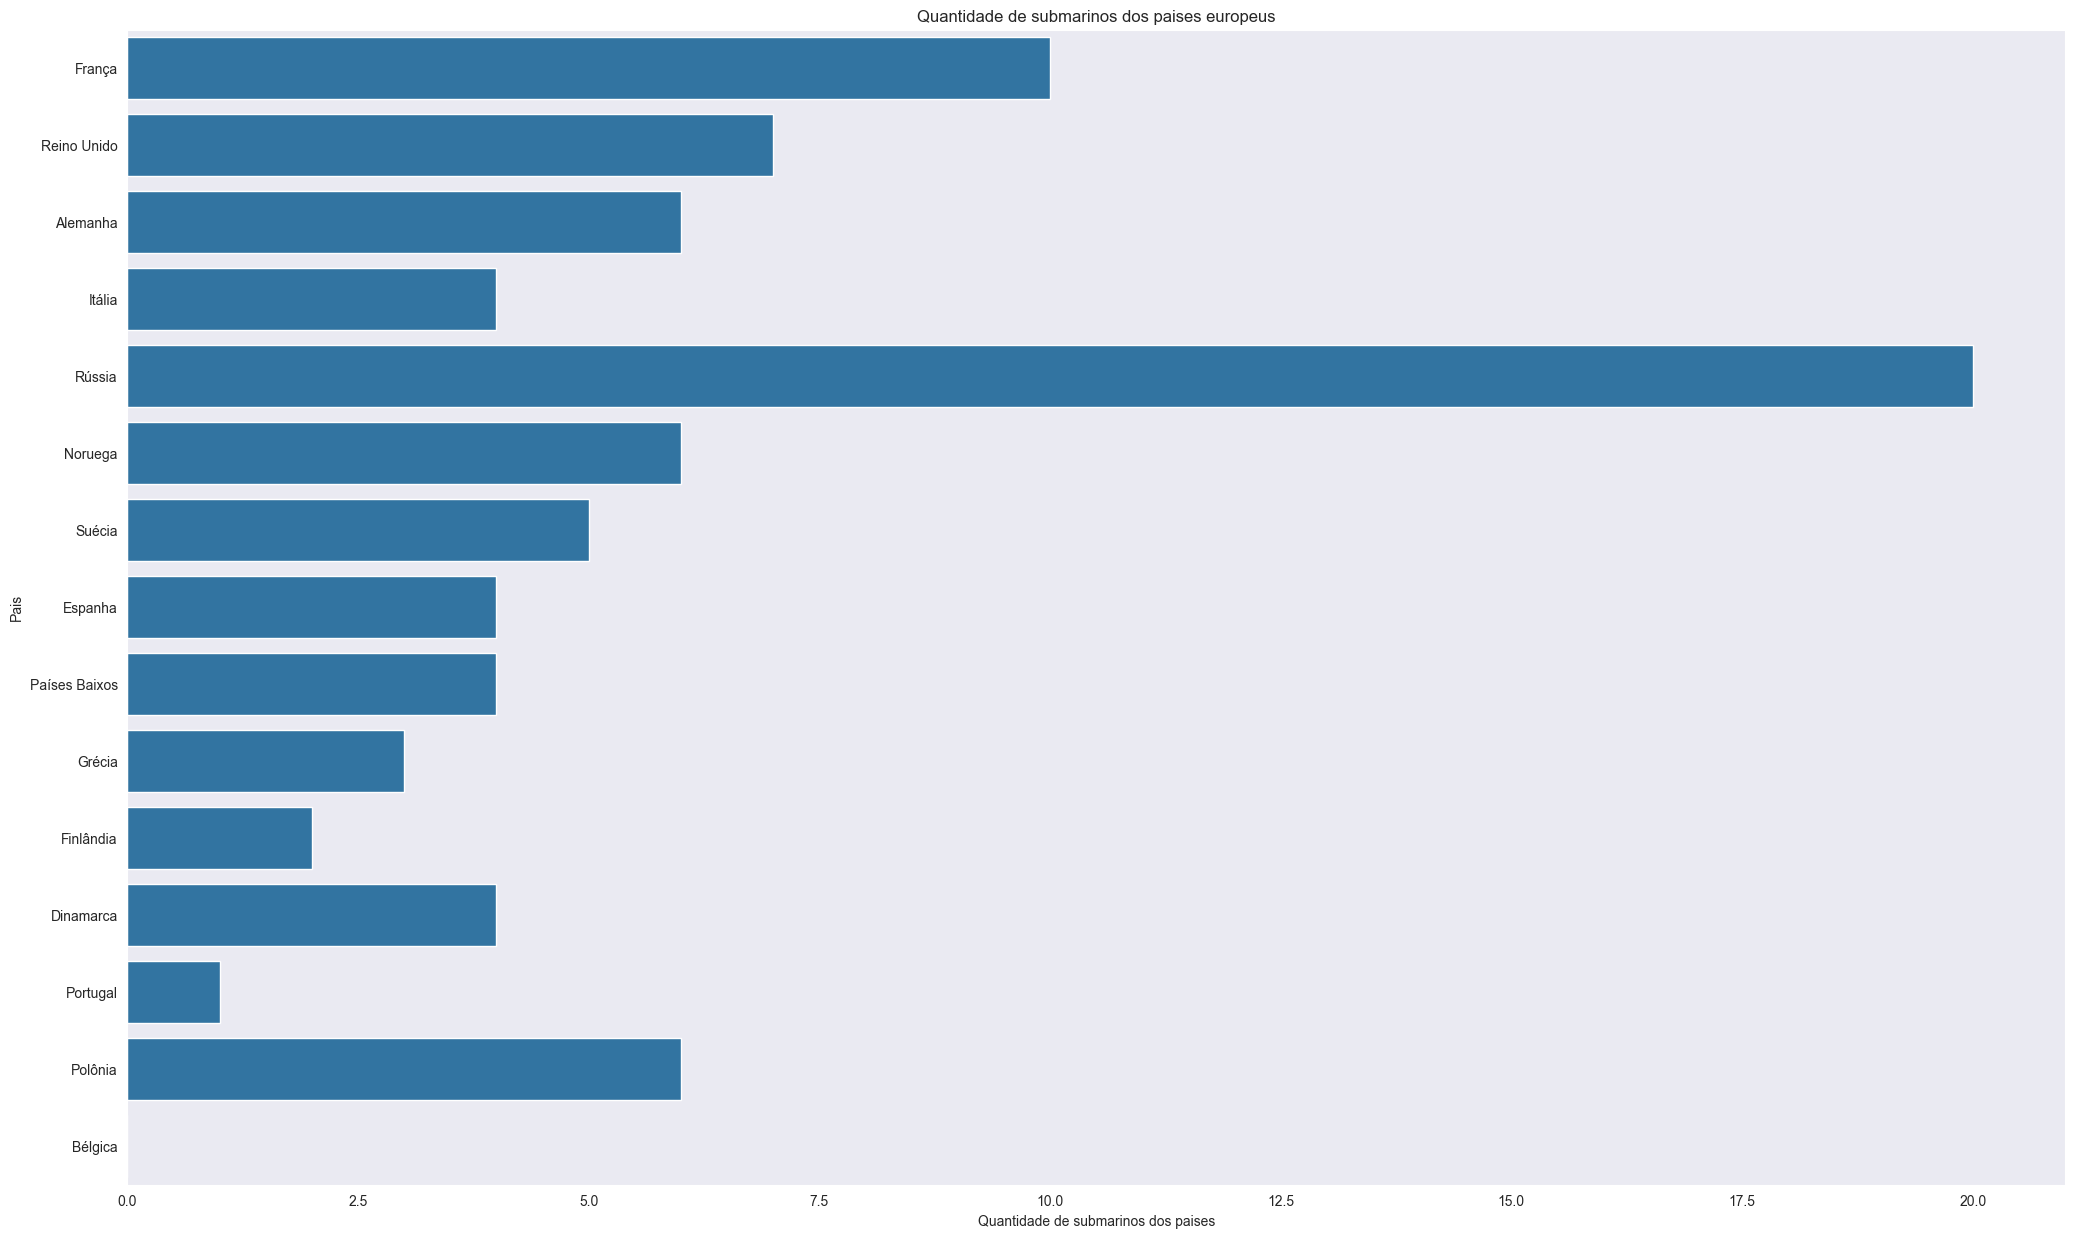

In [14]:
sns.set_style('dark')
plt.figure(figsize=(25,15))
plt.title('Quantidade de submarinos dos paises europeus')
sns.barplot(data=df, x='Submarinos', y='País', orient='h')
plt.xlabel('Quantidade de submarinos dos paises')
plt.ylabel('Pais');

Text(0, 0.5, 'Pais')

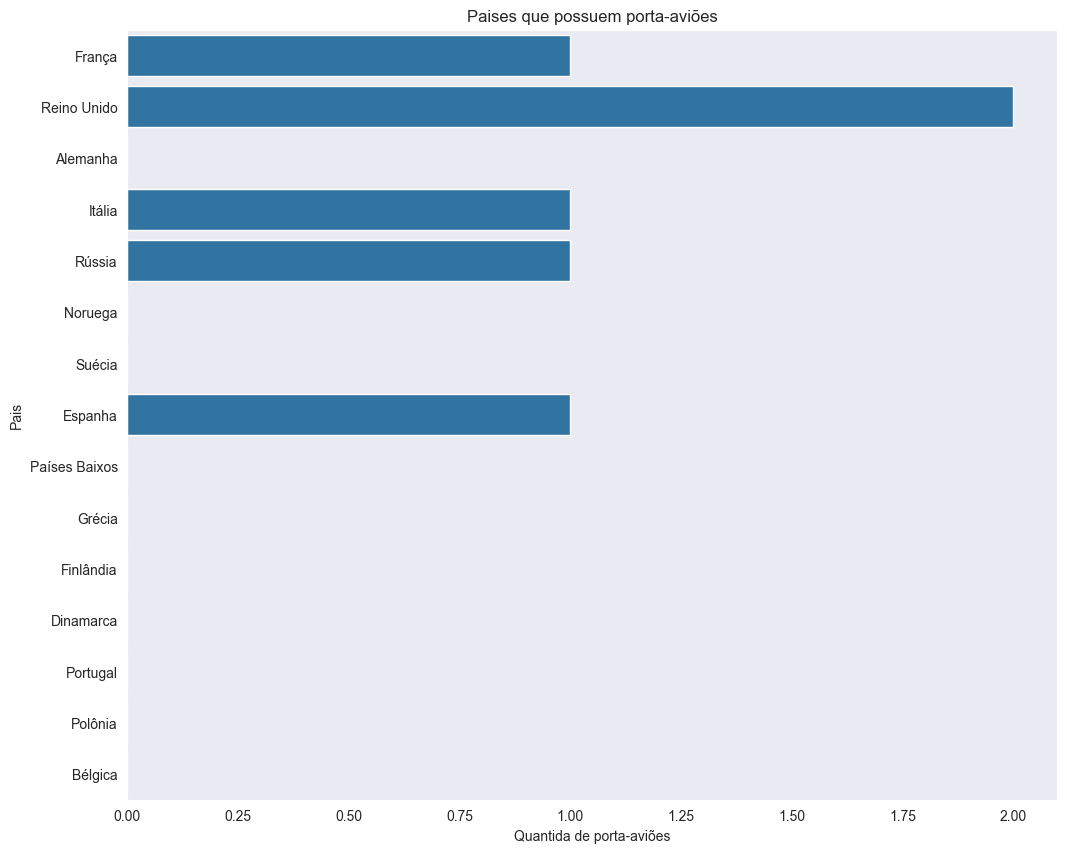

In [15]:
sns.axes_style('darkgrid')
plt.figure(figsize=(12,10))
plt.title('Paises que possuem porta-aviões')
sns.barplot(data=df, x='Porta-aviões', y='País');
plt.xlabel('Quantida de porta-aviões')
plt.ylabel('Pais')


# As Marinhas Europeias Mais Poderosas:
Ao se analisar os dados sobre as forças navais europeias, a Rússia, a França e o Reino Unido se destacam de forma consistente. Essas potências marítimas possuem frotas substanciais, com um arsenal considerável de corvetas, fragatas, destroyers e submarinos. Essa superioridade naval é resultado de investimentos contínuos em tecnologia naval, além de uma longa tradição marítima e de grandes ambições geopolíticas. A Rússia, por exemplo, tem investido significativamente em sua frota do Mar Negro, enquanto a França e o Reino Unido mantêm uma presença naval global, com porta-aviões e submarinos nucleares. Essa superioridade naval reflete não apenas o poder militar dessas nações, mas também sua capacidade de projetar poder em diversas regiões do globo.

# Análise dos Orçamentos das Marinhas Europeias 